In [102]:
# Import Keras libraries and packages 
import pandas as pd
import keras
# Initialize Neural network
from keras.models import Sequential
# Create layers in ANN
from keras.layers import Convolution2D, BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [34]:
from keras.metrics import *

METRICS = [
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

# STEP1
# ADD SEQUENTIAL INSTANCE
classifier = Sequential()

# STEP2
#Layer 1 -  CREATE CONVULATION LAYER
# feature detector (start with 32 and then move on to 64, 128 etc. with 3 by 3 dimensions)
# input shape - shape of all images (making it consistent to 64 by 64 and use 3 for colored pictures and 1 for black n white)

classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Layer 2 - Create Maxpooling Layer
# Pool_size = row and col size of the pool matrix
classifier.add(MaxPooling2D(pool_size = (2,2)))

# ADD SECOND CONVULATIONAL LAYER IF THE TRAINING AND VAL ACCURACY DROPS - Code commented as of now
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Layer 3  - Create Flattening layer
classifier.add(Flatten())

#Layer 4 - Fully Connected Layer
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 6, activation = 'softmax'))

# STEP3
# Compile the CNN
from keras.optimizers import Adam, SGD, RMSprop

optimizer = Adam(lr=0.0001, decay=1e-5)
classifier.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics = METRICS)

classifier.summary()


C:\Users\ksa\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
C:\Users\ksa\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
C:\Users\ksa\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\ksa\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=6)`


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_16 (Dense)             (None, 6)                

In [164]:
img_width = 64
img_height = 64


# Creating training and test data 
# Code copied from https://keras.io/preprocessing/image/#imagedatagenerator-class
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

pred_datagen = ImageDataGenerator(rescale=1./255)

# target size should be same as input_shape in the above code i.e. 64 by 64
# batch size = size of batch or images that should pass through in one set befor the weights are updated
training_set = train_datagen.flow_from_directory('C:/Users/ksa/Downloads/intel-image-classification/seg_train/seg_train',
                                                target_size=(img_width, img_height),
                                                batch_size=32,
                                                class_mode='categorical')

# Creating the test set same way as the training set
test_set = test_datagen.flow_from_directory('C:/Users/ksa/Downloads/intel-image-classification/seg_test/seg_test',
                                            target_size=(img_width, img_height),
                                            batch_size=32,
                                            shuffle = False,
                                            class_mode='categorical')

# Creating the test set same way as the predictions set
pred_set = pred_datagen.flow_from_directory('C:/Users/ksa/Downloads/intel-image-classification/seg_pred/seg_pred/',
                                            target_size=(img_width, img_height),
                                            batch_size=32,
                                            class_mode=None)



Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [66]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_TEST=test_set.n//test_set.batch_size
STEP_SIZE_PRED=pred_set.n//pred_set.batch_size


In [35]:
classifier.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_TEST,
                    epochs=5
)

Epoch 1/5
438/438 [==============================] - 90s 205ms/step - loss: 1.2131 - accuracy: 0.8649 - precision: 0.7610 - recall: 0.2763 - auc: 0.8509 - val_loss: 1.3236 - val_accuracy: 0.8674 - val_precision: 0.6614 - val_recall: 0.4187 - val_auc: 0.8575
Epoch 2/5
438/438 [==============================] - 92s 210ms/step - loss: 0.9687 - accuracy: 0.8876 - precision: 0.7697 - recall: 0.4643 - auc: 0.9069 - val_loss: 0.7447 - val_accuracy: 0.8890 - val_precision: 0.7383 - val_recall: 0.5172 - val_auc: 0.9023
Epoch 3/5
438/438 [==============================] - 92s 211ms/step - loss: 0.8861 - accuracy: 0.8961 - precision: 0.7845 - recall: 0.5190 - auc: 0.9224 - val_loss: 0.8496 - val_accuracy: 0.8929 - val_precision: 0.7353 - val_recall: 0.5580 - val_auc: 0.9158
Epoch 4/5
438/438 [==============================] - 92s 210ms/step - loss: 0.8363 - accuracy: 0.9015 - precision: 0.7872 - recall: 0.5603 - auc: 0.9308 - val_loss: 0.9262 - val_accuracy: 0.9043 - val_precision: 0.7777 - val_r

## Transfer learning - VGG16

In [36]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense

import numpy as np

In [92]:
img_width, img_height = 64, 64
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

In [93]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [90]:
for layer in vgg16.layers:
  layer.trainable=False

top_model = Sequential()
top_model.add(Flatten(input_shape=bottleneck_train.shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))
    
model = Sequential()
model.add(vgg16)
model.add(Dense(256, activation='relu', input_dim=(img_width, img_height, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax')) 
model.compile(loss='categorical_crossentropy',
          optimizer=Adam(lr = 1e-6),
          metrics = METRICS)

for layer in model.layers[-2:]:
  layer.trainable=True

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
dense_32 (Dense)             (None, 7, 7, 256)         131328    
_________________________________________________________________
dense_33 (Dense)             (None, 7, 7, 256)         65792     
_________________________________________________________________
dense_34 (Dense)             (None, 7, 7, 6)           1542      
Total params: 14,913,350
Trainable params: 198,662
Non-trainable params: 14,714,688
_________________________________________________________________


In [94]:
# use transfer learning for re-training the last layers
# Freeze first 25 layers, so that we can retrain 26th and so on using our classes.
# for layer in vgg16.layers[:-2]:
#    layer.trainable = False

for layer in vgg16.layers:
  layer.trainable=False


#Add a layer where input is the output of the  second last layer 
Z = Flatten(name='flatten')(vgg16.layers[-1].output)
New = Dense(6, activation='softmax', name='predictions')(Z)


#Then create the corresponding model 
model = Model(input=vgg16.input, output=New)

for layer in model.layers[-1:]:
  layer.trainable=True

model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0  

C:\Users\ksa\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  app.launch_new_instance()


In [104]:
# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x000001718193CDC8> False
<keras.layers.convolutional.Conv2D object at 0x0000017180E93D88> False
<keras.layers.convolutional.Conv2D object at 0x0000017181BBD8C8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001718206C488> False
<keras.layers.convolutional.Conv2D object at 0x00000171820596C8> False
<keras.layers.convolutional.Conv2D object at 0x000001718208DB08> False
<keras.layers.pooling.MaxPooling2D object at 0x00000171820C8448> False
<keras.layers.convolutional.Conv2D object at 0x00000171820C83C8> False
<keras.layers.convolutional.Conv2D object at 0x00000171820F6848> False
<keras.layers.convolutional.Conv2D object at 0x0000017182506388> False
<keras.layers.pooling.MaxPooling2D object at 0x0000017180054588> False
<keras.layers.convolutional.Conv2D object at 0x0000017180035108> False
<keras.layers.convolutional.Conv2D object at 0x0000017180113488> False
<keras.layers.convolutional.Conv2D object at 0x00000171B3A31048> False
<ker

In [96]:
from keras.metrics import *

METRICS = [
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]
# my_model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=METRICS)
from keras.optimizers import Adam, SGD, RMSprop

optimizer = SGD(lr=0.01)

model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=METRICS)

In [97]:
model.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_TEST,
                    epochs=5
)

Epoch 1/5
438/438 [==============================] - 532s 1s/step - loss: 0.9329 - accuracy: 0.8922 - precision: 0.8144 - recall: 0.4571 - auc: 0.9199 - val_loss: 0.7017 - val_accuracy: 0.9217 - val_precision: 0.8403 - val_recall: 0.6542 - val_auc: 0.9576
Epoch 2/5
438/438 [==============================] - 527s 1s/step - loss: 0.6856 - accuracy: 0.9206 - precision: 0.8230 - recall: 0.6669 - auc: 0.9543 - val_loss: 0.5162 - val_accuracy: 0.9225 - val_precision: 0.8135 - val_recall: 0.6937 - val_auc: 0.9587
Epoch 3/5
438/438 [==============================] - 523s 1s/step - loss: 0.6383 - accuracy: 0.9252 - precision: 0.8262 - recall: 0.6978 - auc: 0.9595 - val_loss: 0.6546 - val_accuracy: 0.9308 - val_precision: 0.8390 - val_recall: 0.7234 - val_auc: 0.9653
Epoch 4/5
438/438 [==============================] - 526s 1s/step - loss: 0.6108 - accuracy: 0.9285 - precision: 0.8299 - recall: 0.7185 - auc: 0.9626 - val_loss: 0.4734 - val_accuracy: 0.9358 - val_precision: 0.8519 - val_recall: 0

## Transfer learning - with BatchNormalization and Dropout layers (to improve acc)

In [106]:
# use transfer learning for re-training the last layers
# Freeze first 25 layers, so that we can retrain 26th and so on using our classes.
# for layer in vgg16.layers[:-2]:
#    layer.trainable = False

for layer in vgg16.layers:
  layer.trainable=False


#Add flatter, BN, Dropout and Dense output layers-  where input is the output of the  second last layer 
Z = Flatten(name='flatten')(vgg16.layers[-1].output)
Z = BatchNormalization(name = 'BN')(Z)
Z = Dropout(0.5)(Z)
New = Dense(6, activation='softmax', name='predictions')(Z)


#Then create the corresponding model 
model = Model(input=vgg16.input, output=New)

for layer in model.layers[-1:]:
  layer.trainable=True

model.summary()


Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0  

C:\Users\ksa\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`


In [107]:
from keras.metrics import *

METRICS = [
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]
# my_model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=METRICS)
from keras.optimizers import Adam, SGD, RMSprop

optimizer = SGD(lr=0.01)

model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=METRICS)

In [108]:
history = model.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_TEST,
                    epochs=5
)

Epoch 1/5
438/438 [==============================] - 501s 1s/step - loss: 0.9399 - accuracy: 0.8976 - precision: 0.7242 - recall: 0.6233 - auc: 0.9181 - val_loss: 0.3865 - val_accuracy: 0.9335 - val_precision: 0.8346 - val_recall: 0.7497 - val_auc: 0.9662
Epoch 2/5
438/438 [==============================] - 497s 1s/step - loss: 0.7307 - accuracy: 0.9184 - precision: 0.7807 - recall: 0.7102 - auc: 0.9476 - val_loss: 0.7288 - val_accuracy: 0.9399 - val_precision: 0.8446 - val_recall: 0.7837 - val_auc: 0.9685
Epoch 3/5
438/438 [==============================] - 527s 1s/step - loss: 0.6800 - accuracy: 0.9242 - precision: 0.7958 - recall: 0.7332 - auc: 0.9541 - val_loss: 0.4619 - val_accuracy: 0.9397 - val_precision: 0.8449 - val_recall: 0.7817 - val_auc: 0.9702
Epoch 4/5
438/438 [==============================] - 523s 1s/step - loss: 0.6656 - accuracy: 0.9240 - precision: 0.7973 - recall: 0.7293 - auc: 0.9555 - val_loss: 0.3165 - val_accuracy: 0.9394 - val_precision: 0.8426 - val_recall: 0

## Assess metrics and accuracy

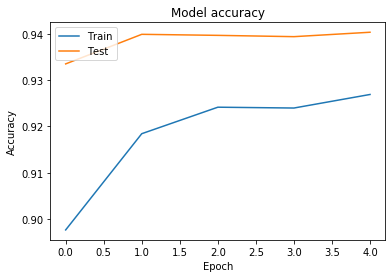

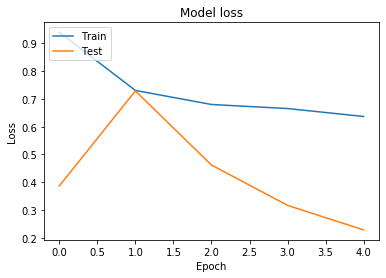

In [115]:
import matplotlib.pyplot as plot

plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [166]:
# Predict the model on test set
test_set.reset()
pred=model.predict_generator(test_set,
steps=STEP_SIZE_TEST + 1,
verbose=1)

# predicted class  - change the array to 0,1
predicted_class=np.argmax(pred,axis=1)

# Extract actual test data classes and labels
actual_class = test_set.classes
class_labels = list(test_set.class_indices.keys()) 

# classification report
report = classification_report(actual_class, predicted_class, target_names=class_labels)
print(report) 

acc = accuracy_score(actual_class, predicted_class)
print(acc)

94/94 [==============================] - 84s 891ms/step
              precision    recall  f1-score   support

   buildings       0.78      0.84      0.81       437
      forest       0.93      0.96      0.94       474
     glacier       0.76      0.79      0.77       553
    mountain       0.81      0.68      0.74       525
         sea       0.79      0.82      0.80       510
      street       0.84      0.83      0.84       501

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.81      3000

0.816


In [168]:
# Evaluate the model to get the corresponding Accuracy, Precision, and Recall
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

CM =confusion_matrix(actual_class,predicted_class)
# print("Confusion Matrix :")
print(CM)

[[369   9   1   3   9  46]
 [  1 455   1   2   1  14]
 [ 10   5 436  56  40   6]
 [ 14   4  89 357  55   6]
 [ 16   7  45  20 416   6]
 [ 64  10   2   2   8 415]]


In [170]:
test_set.reset()
Y_pred = model.predict_generator(test_set)
classes = test_set.classes[test_set.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
sum(y_pred==classes)/10000

0.2448

In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_set.classes[test_set.index_array],y_pred)

array([[369,   9,   1,   3,   9,  46],
       [  1, 455,   1,   2,   1,  14],
       [ 10,   5, 436,  56,  40,   6],
       [ 14,   4,  89, 357,  55,   6],
       [ 16,   7,  45,  20, 416,   6],
       [ 64,  10,   2,   2,   8, 415]], dtype=int64)